# Montecarlo calculation for Lennard Jones potential

## Lennard Jones potential
$V(r)=4(\frac{1}{r^{12}}-\frac{1}{r^6})$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

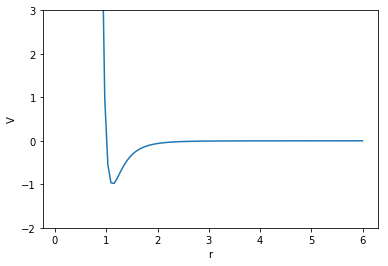

In [2]:
x=np.linspace(0,6, 100)[1:]
y=4*(1/x**12-1/x**6)

plt.plot(x,y)
plt.xlabel('r')
plt.ylabel('V')
plt.ylim(-2, 3)
plt.show()

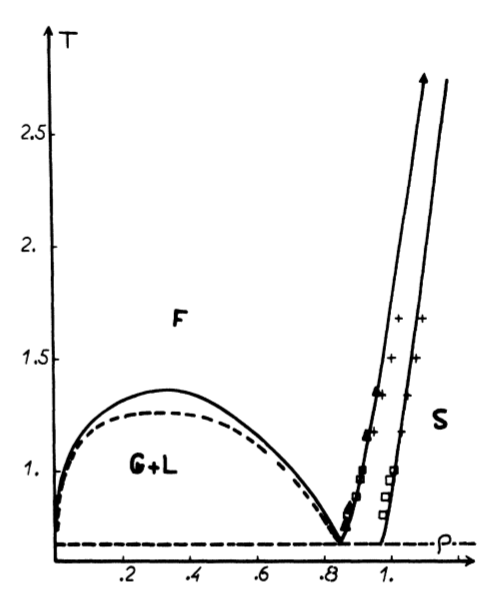

In [3]:
from IPython.display import Image
Image("phasediag.png")

## Utilities

In [185]:
import re
import glob

# Read commented lines of the format '# NAME value' and return a dictionary: d['NAME']=value
def get_data(file):
    d=dict()
    with open(file) as f:
        for line in f:
            try:
                m = re.match("# (\S+) (\d+.\d+)", line)
                d[m.group(1)]=float(m.group(2))
            except:
                try:
                    m = re.match("# (\S+) -(\d+.\d+)", line)
                    d[m.group(1)]=-float(m.group(2))
                except:
                    try:
                        m = re.match("# (\S+) (\d+)", line)
                        d[m.group(1)]=int(m.group(2))
                    except: pass
    return d    

In [ ]:
dt = np.dtype([('BETA', np.float64), ('MCTIME', np.float64), ('VIRIAL1', np.float64), ('DELTA', np.float64),
               ('ENERGY', np.float64), ('N1', np.int32), ('L', np.float64), ('ACCEPTANCE', np.float64),
               ('ENERGYSQUARE', np.float64), ('TEMPERATURE', np.float64), ('DENSITY', np.float64),
               ('PRESSURE', np.float64),('CV', np.float64), ('ENERGYERR', np.float64), ('CVERR', np.float64),
               ('N', np.int32), ('THERMTIME', np.float64)])

## Equilibration time

0.4999060176686784 2.0 -3.03862 2.429041673498716
{'VIRIAL1': -8.57699, 'BINMIN': 50, 'THERMTIME': 17550.0, 'DELTA': 0.09, 'ENERGY': -3.03862, 'N1': 5, 'L': 6.3, 'ACCEPTANCE': 0.48681, 'ENERGYSQUARE': 9.24294, 'MCTIME': 3600000.0, 'BETA': 0.5, 'DELTAIN': 0.09, 'BTIME': 3600000.0}


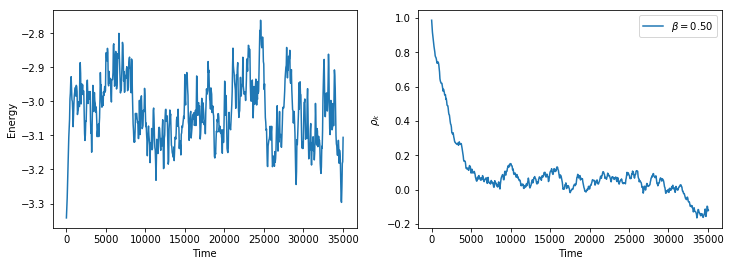

In [258]:
f, axarr = plt.subplots(1,2,figsize=(12,4))

for file in glob.glob('./data/*.out'):
    d=get_data(file)
    arr=np.genfromtxt(file, usemask=True, delimiter='\t')
    indmax=int(2*d['THERMTIME']/d['BINMIN'])
    energyth, virth, rhokth = np.transpose(arr[:indmax])
    energybin, virbin =np.transpose(arr[indmax:])[:-1]
    axarr[0].plot(d['BINMIN']*np.arange(len(rhokth)),energyth, label = r'$\beta=$%.2f' % d['BETA'])
    axarr[0].set_xlabel('Time')
    axarr[0].set_ylabel('Energy')
    axarr[1].plot(d['BINMIN']*np.arange(len(rhokth)),rhokth, label = r'$\beta=$%.2f' % d['BETA'])
    axarr[1].set_xlabel('Time')
    axarr[1].set_ylabel(r'$\rho_k$')
    T=1/d['BETA']
    rho = (d['N1']/d['L'])**3
    Press=(T-d['VIRIAL1']/3)*rho
    print(rho, T, d['ENERGY'], Press)
    print(d)
    
handles, labels = axarr[1].get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
axarr[1].legend(handles, labels)
plt.show()

## Correlation time

Block technique: we divide the simulation (total number of steps $N_{steps}$) into $k$ blocks of length $t_B$ ($N_{steps}=k*t_B$). We compute the average energy over each bin $E_{b_i}$

\begin{equation}

\end{equation}

$s^2=\frac{1}{k(k-1)}\sum_{i=1}^k (x_{B_j}-\bar{x})^2$

When the size of the block is much larger than correlation time, it goes to a constant value

In [349]:
def jk_varvar(arr):
    arr1=np.mean(arr)
    arr2=np.mean(arr**2)
    arr3=np.mean(arr**3)
    arr4=np.mean(arr**4)
    return (8*arr2*arr1**2+arr4-arr2**2-4*arr1*arr3-4*arr1**4)*len(arr)**2/(len(arr)-1)**3/(len(arr)-2)


def bintechnique(arr, binning):
    binnum=int(len(arr)/binning)
    red_arr = np.reshape(arr, (binning, binnum), order='F').mean(axis=0)
    return np.var(red_arr, ddof=1)/binnum, np.sqrt(jk_varvar(red_arr)/(binnum-1))

npbintec=np.vectorize(bintechnique, signature='(n),()->(),()')

13.0916888285 1.65506185731


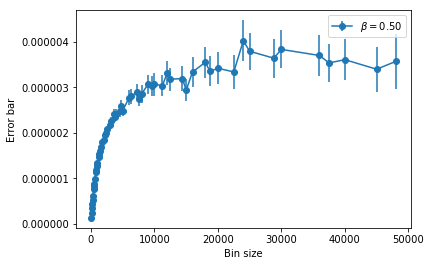

In [354]:
bins = np.array([i for i in range(1,1000) if int(d['BTIME']/d['BINMIN'])%i==0])

res=npbintec(energybin, bins)
deltaE=np.mean(res[0][-8:])*d['BTIME']
deltacv=np.mean(res[1][-8:])*d['BTIME']
print(deltaE, deltacv)
plt.errorbar(bins*d['BINMIN'], res[0], marker='o', yerr=res[1], label = r'$\beta=$%.2f' % d['BETA'])

plt.xlabel('Bin size')
plt.ylabel('Error bar')
plt.legend()
plt.show()

Building input for comparison

In [359]:
nictab=np.loadtxt('./nicolastab.dat')

## Tail corrections

In [ ]:
rc=L1/2
energytail=(8*np.pi/3)*density*(rc**(-9)/3-rc**(-6))
vir1tail=

## Pressure

[ 0.02454606  0.01563194  0.01089754  0.01073071  0.00929639  0.01053618]
{'N1': 5, 'L': 6.3, 'NSTEPS': 1000000.0, 'BINSTEP': 2500.0, 'EQTIME': 10000.0}


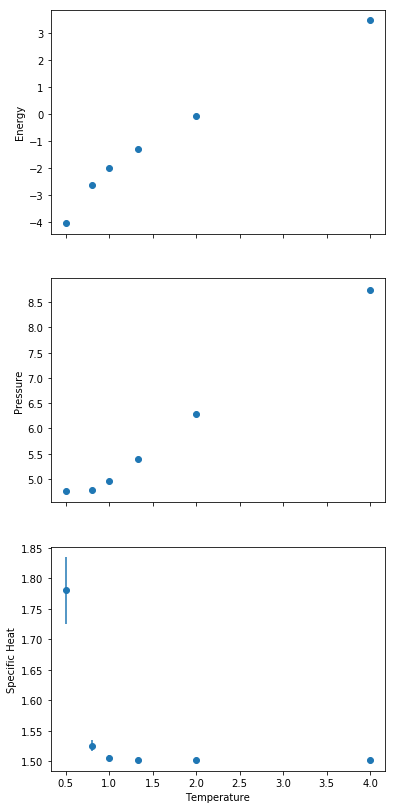

In [243]:
f, axarr = plt.subplots(3,figsize=(6,14), sharex=True)

for file in glob.glob('./lennardjonesmc/isochoric/*.out'):
    beta, delta, energy1, energy2, energy3, energy4, vir1, vir2, rhoN, acceptance = np.loadtxt(file, unpack=True)
    d=get_data(file)
    Nsample = d['NSTEPS']/d['BINSTEP']
    
    T=1/beta
    rho = (d['N1']/d['L'])**3
    
    Energy=1.5*T+energy1
    DEnergy=np.sqrt((energy2-energy1**2)/(Nsample-1))
    
    Press=(T-vir1/3)*rho
    DPress=np.sqrt((vir2-vir1**2)/(Nsample-1))*rho/3
    
    cv=1.5+beta**2*(energy2-energy1**2)
    Dcv=beta**2*(8*energy2*energy1**2+energy4-energy2**2-4*energy1*energy3-4*energy1*4)*Nsample**3/(Nsample-1)**5
    

    axarr[0].errorbar(T, Energy, yerr=DEnergy, fmt='o')
    #axarr[0].plot(T, 1.5*T, linestyle='--')
    axarr[0].set_ylabel('Energy')
    axarr[1].errorbar(T, Press, yerr=DPress, fmt='o')
    #axarr[1].plot(T, rho*T, linestyle='--')
    axarr[1].set_ylabel('Pressure')
    axarr[2].errorbar(T, cv, yerr=Dcv, fmt='o')
    #axarr[2].axhline(y=1.5 , linestyle='--')
    axarr[2].set_ylabel('Specific Heat')
    axarr[2].set_xlabel('Temperature')
    print(d)

#plt.legend()
plt.show()

## Jackknife estimate of error bars for specific heat

We want to evaluate the error of the quantity $x=\bar{E^2}-\bar{E}^2$ (where the $E_i$ are all independent, i.e. we sample after a time much longer than correlation time). We cannot simply deduce it from the errors of $\bar{E^2}$ and $\bar{E}$ because they are correlated stocastic variables. We apply jackknife technique: $c_i^J$ is obtained excluding $E_i$ from the sample.
\begin{equation}
x_i^J=\frac{N\bar{E^2}-E_i^2}{N-1}-\left[\frac{N\bar{E}-E_i}{N-1}\right]^2
\end{equation}

The error according to jackknife technique is given by
\begin{equation}
\delta x =\sqrt{\frac{1}{N-1}\sum_i (x_i^J-\bar{x^J})^2}
\end{equation}

Calculations yield
\begin{equation}
\bar{x^J}=\sum_i x_i^J =\frac{N(N-2)}{(N-1)^2}(\bar{E^2}-\bar{E}^2)
\end{equation}

\begin{equation}
\delta x^2 =\frac{N^3}{(N-1)^5}(8\bar{E^2}\bar{E}^2+\bar{E^4}-{\bar{E^2}}^2-4\bar{E}\bar{E^3}-4\bar{E}^4)
\end{equation}


## Isothermal

[ 0.482281  0.510169  0.47071   0.506291  0.475858  0.508719  0.482891
  0.471302  0.457944  0.472001  0.430505  0.438563  0.442165  0.389566
  0.430157]
[ 0.498604  0.526368  0.485066  0.516133  0.495112  0.523279  0.505626
  0.492103  0.495828  0.48978   0.465941  0.491217  0.49478   0.460579
  0.489093]
[ 0.492069  0.528122  0.491966  0.521176  0.493323  0.530769  0.511902
  0.497839  0.498756  0.496704  0.484789  0.506577  0.50137   0.461535
  0.498064]


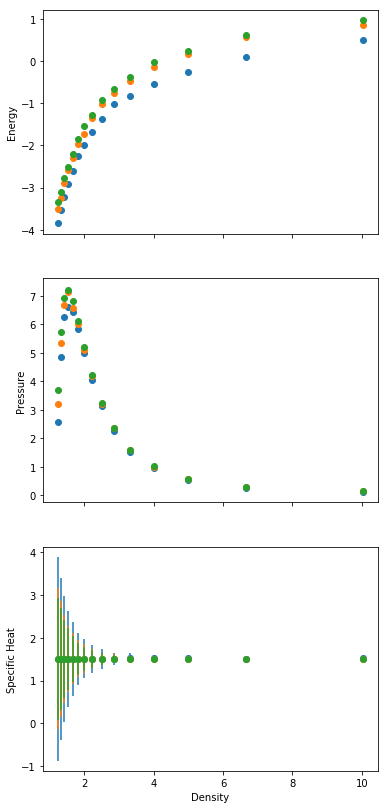

In [308]:
f, axarr = plt.subplots(3,figsize=(6,14), sharex=True)

for file in glob.glob('./lennardjonesmc/isothermal/*.out'):
    L, delta, energy1, energy2, energy3, energy4, vir1, vir2, rhoN, acceptance = np.loadtxt(file, unpack=True)
    d=get_data(file)
    Nsample = d['NSTEPS']/d['BINSTEP']
    
    T=d['T']
    beta=1/T
    rho = (d['N1']/L)**3
    
    Energy=1.5*T+energy1
    DEnergy=np.sqrt((energy2-energy1**2)/(Nsample-1))
    
    Press=(T-vir1/3)*rho
    DPress=np.sqrt((vir2-vir1**2)/(Nsample-1))*rho/3
    
    cv=1.5+beta**2*(energy2-energy1**2)
    Dcv=beta**2*(8*energy2*energy1**2+energy4-energy2**2-4*energy1*energy3-4*energy1*4)*Nsample**3/(Nsample-1)**5
    

    axarr[0].errorbar(1/rho, Energy, yerr=DEnergy, fmt='o')
    #axarr[0].plot(T, 1.5*T, linestyle='--')
    axarr[0].set_ylabel('Energy')
    axarr[1].errorbar(1/rho, Press, yerr=DPress, fmt='o')
    #axarr[1].plot(T, rho*T, linestyle='--')
    axarr[1].set_ylabel('Pressure')
    axarr[2].errorbar(1/rho, cv, yerr=Dcv, fmt='o')
    #axarr[2].axhline(y=1.5 , linestyle='--')
    axarr[2].set_ylabel('Specific Heat')
    axarr[2].set_xlabel('Density')
    print(acceptance)

#plt.legend()
plt.show()

In [297]:
density=np.array([0.1,0.15, 0.2,0.25, 0.3,0.35,0.4,0.45,0.5,0.55,0.6, 0.65,0.7,0.75,0.8])
5*density**(-1/3)

array([ 10.77217345,   9.41036029,   8.54987973,   7.93700526,
         7.46900791,   7.09491706,   6.78604404,   6.5247794 ,
         6.29960525,   6.10261222,   5.92815551,   5.77207837,
         5.6312394 ,   5.50321208,   5.38608673])

1.3333333333333333